In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

path = "./drive/MyDrive/Colab Notebooks/ADT_Project/"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Text to CSV

In [ ]:
# Clean the queries
def clean_data(data):
  for i in range(len(data)):
    data[i].replace('\n', '')
    data[i].replace('%20', ' ')
    data[i].replace('=', ' = ')
    data[i].replace('((', ' (( ')
    data[i].replace('))', ' )) ')
    data[i].replace('(', ' ( ')
    data[i].replace(')', ' ) ')
    return data


In [ ]:
# Read data from text file and get 'Sentence' & 'Label'

sql_lines=[]
f = open(path+"dataset_updated.txt", "r")
for x in f:
  sentence = x.split("::::")[0]
  label = x.split("::::")[1]
  sentence = clean_data(sentence)
  label = int(clean_data(label))

  sql_lines.append([sentence, label])

# for i in range(0, 10):
#   print(sql_lines_fuzzing[i], end="\n")


In [ ]:
df=pd.DataFrame(sql_lines,columns=['Sentence','Label'])

print(df.head())

                                            Sentence  Label
0  db.mycol.find({$and:[{"by":"tutorials point"},...      0
1  db.collection('users').findOne({""username"": ...      1
2       db.Document.find({ "type": { "$gte": "" } })      1
3       db.Document.find({ "type": { "$ne: 0 "" } })      1
4  db.books.insert({ title: 'The Hobbit', author:...      0


In [ ]:
# Store data as csv
df.to_csv(path + 'processed_data.csv', index=False)

### Reading and displaying the dataset

In [ ]:
df = pd.read_csv(path+'processed_data.csv') # Read the dataset.
df.head(10)

,Sentence,Label
0,"db.mycol.find({$and:[{""by"":""tutorials point""},...",0
1,"db.collection('users').findOne({""""username"""": ...",1
2,"db.Document.find({ ""type"": { ""$gte"": """" } })",1
3,"db.Document.find({ ""type"": { ""$ne: 0 """" } })",1
4,"db.books.insert({ title: 'The Hobbit', author:...",0
5,db.books.find({ title: 'The Hobbit' }),0
6,"db.logins.find({ username: 'tolkien', password...",0
7,"db.logins.find({ username: { $ne: 1 }, passwor...",1
8,"db.doc.find({ username: 'tolkien', $or: [ {}, ...",1
9,"db.user.save({""_id"" : 1234, ""name"" : {""first"":...",0


## Analyze and Process the data

In [ ]:
df.shape

(1004, 2)

In [ ]:
df.head()

,Sentence,Label
0,"db.mycol.find({$and:[{""by"":""tutorials point""},...",0
1,"db.collection('users').findOne({""""username"""": ...",1
2,"db.Document.find({ ""type"": { ""$gte"": """" } })",1
3,"db.Document.find({ ""type"": { ""$ne: 0 """" } })",1
4,"db.books.insert({ title: 'The Hobbit', author:...",0


In [ ]:
print("----------------------------------------------------")
df.info()
print("----------------------------------------------------")

----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  1004 non-null   object
 1   Label     1004 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
----------------------------------------------------


In [ ]:
df['Label'].describe()

count    1004.000000
mean        0.202191
std         0.401834
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Label, dtype: float64

#### Process NaN values

In [ ]:
print("NaN valeus Count in Label Column = ", df['Label'].isna().sum(), end="\n")
print("NaN valeus Count in Sentence Column = ", df['Sentence'].isna().sum())

NaN valeus Count in Label Column =  0
NaN valeus Count in Sentence Column =  0


In [ ]:
df = df.dropna() # Remove Nan values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  1004 non-null   object
 1   Label     1004 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df[df['Label'] == 1].count() # Count how much label are 1.

Sentence    203
Label       203
dtype: int64

In [ ]:
df[df['Label'] == 0].count() # Count how much label are 0.

Sentence    801
Label       801
dtype: int64

### Distribution of the label

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



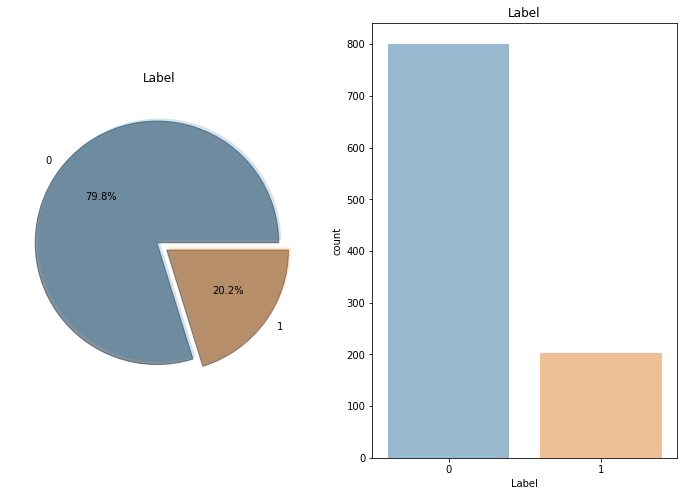

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot('Label',data=df,ax=ax[1], alpha=0.5)
ax[1].set_title('Label')
plt.show()

In [ ]:
df.head()

,Sentence,Label
0,"db.mycol.find({$and:[{""by"":""tutorials point""},...",0
1,"db.collection('users').findOne({""""username"""": ...",1
2,"db.Document.find({ ""type"": { ""$gte"": """" } })",1
3,"db.Document.find({ ""type"": { ""$ne: 0 """" } })",1
4,"db.books.insert({ title: 'The Hobbit', author:...",0


### How many comments symbols are in the payloads ?

In [ ]:
comment_values = df[df.Sentence.str.contains('#|--|//')]

In [ ]:
comment_values.count()[0] # How many comments symbols are in the payloads.

90

### Top used words in payloads

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-43-97f186f72edf>:7: FutureWarning:

The default value of regex will change from True to False in a future version.



All frequencies, including STOPWORDS:
      Frequency
Word           
:          4880
{          3847
}          3845
''         3191
``         2784
,          2382
$          2236
(          1546
)          1531
[           807


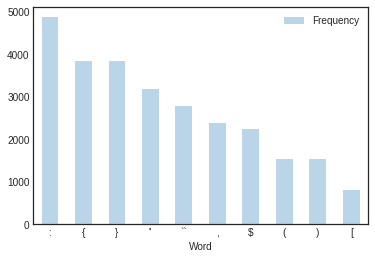

In [ ]:
import nltk
nltk.download('punkt')

top_N = 10


payloads = df.Sentence.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(payloads)
word_dist = nltk.FreqDist(words)


print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
print('=' * 60)

matplotlib.style.use('seaborn-white')

rslt.plot.bar(rot=0, alpha=0.3)

In [ ]:
df.shape

(1004, 2)